In [269]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')

<b>  working with new csv file name Data_Marketing_Customer_Analysis_Round2.csv that has Response and Sales Channel

In [219]:
def load_original_data():
    return pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv" )

In [220]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer"])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    # we drop effective_to_date column
    df=df.drop(columns=['effective_to_date'])
    ## removing duplicates
    df=df.drop_duplicates()
    return df

In [221]:
def transform(df):
    df=df[df['income']>0]
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df.vehicle_class[customers_df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[customers_df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df=df.drop(columns=["month","education"])
    df.number_of_policies[df.number_of_policies>2]=3
    return df

In [222]:
customers_df=load_original_data()
customers_df=clean_data(customers_df)
customers_df=transform(customers_df)

In [223]:
customers_df.shape

(6675, 21)

In [224]:
customers_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

# Plotting

EDA Catgorical Columns 

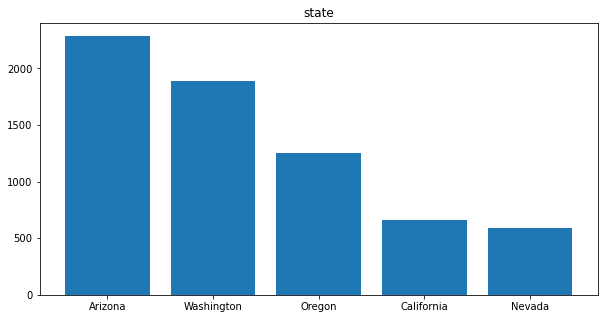

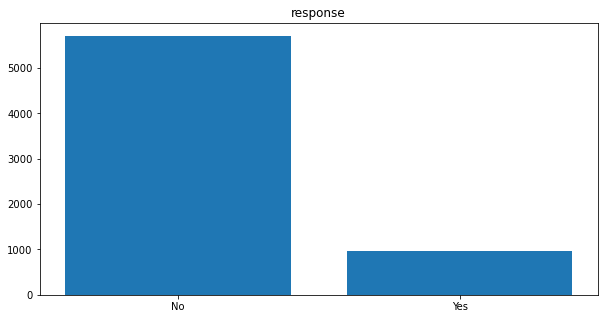

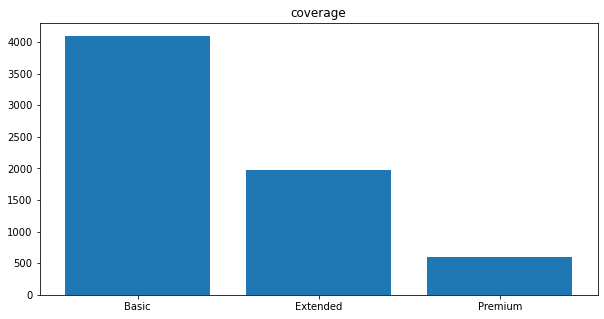

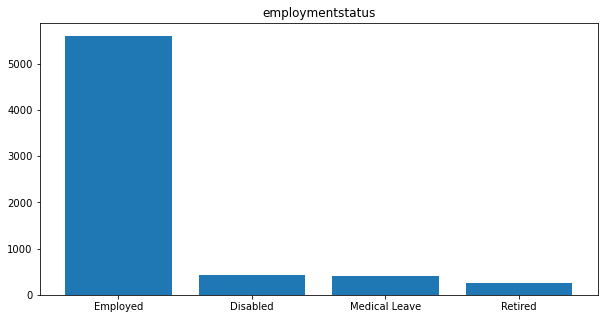

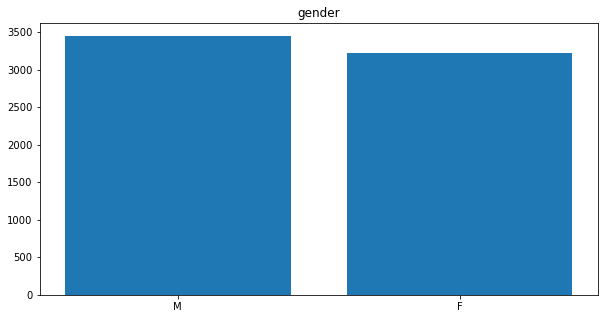

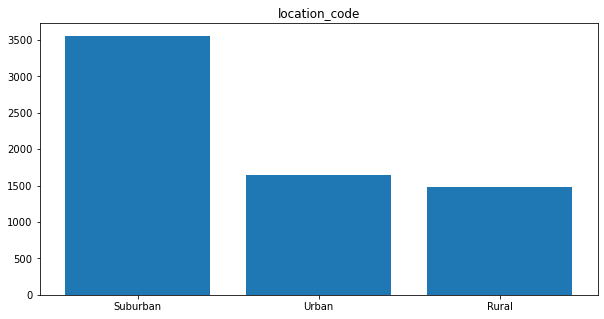

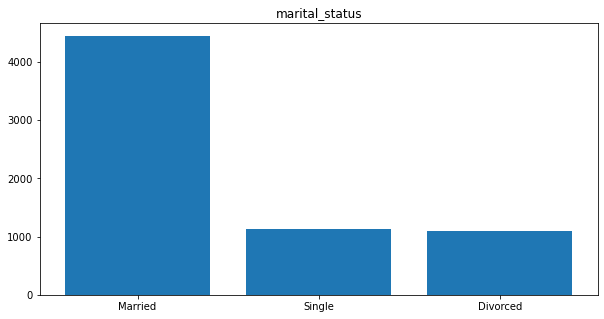

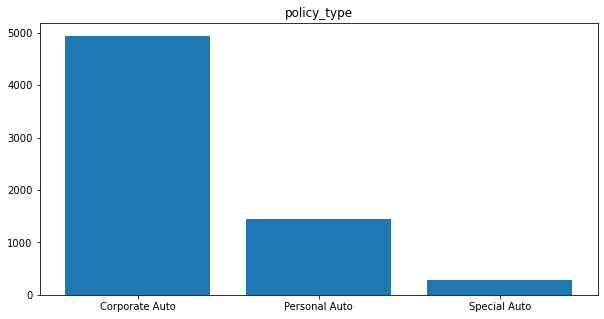

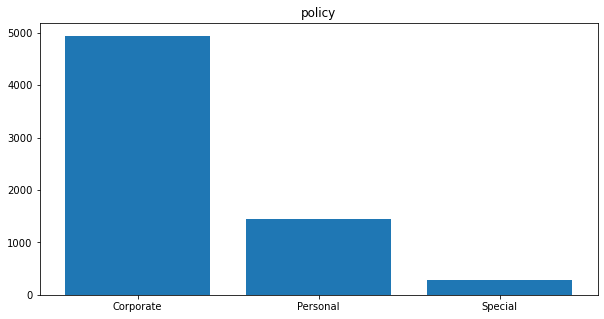

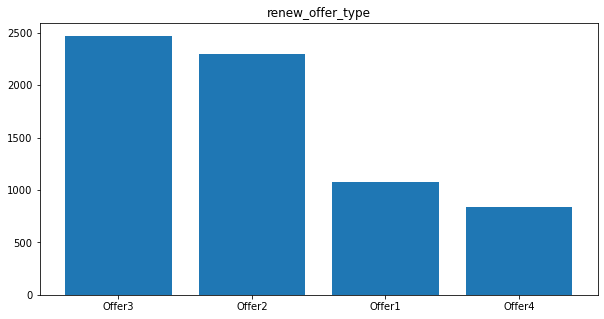

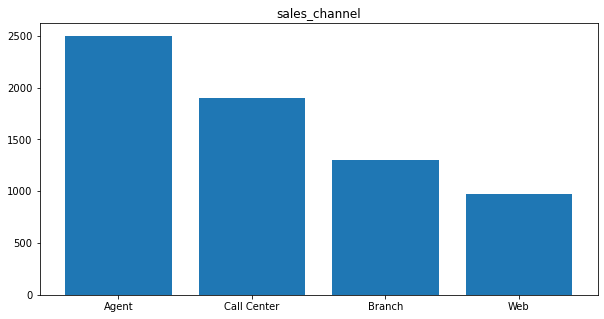

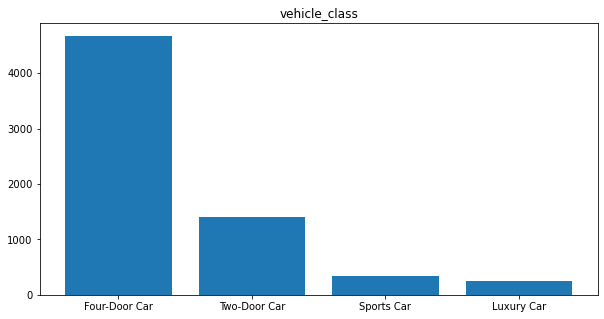

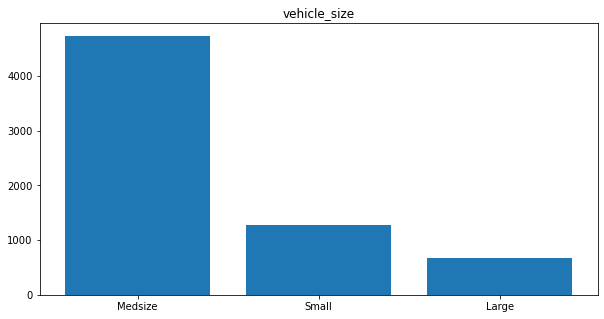

In [225]:
for c in customers_df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(customers_df[c].unique(), customers_df[c].value_counts())
    plt.title(c)
    plt.show();

### Removing outliers

<b> customer life time value

<AxesSubplot:xlabel='customer_lifetime_value'>

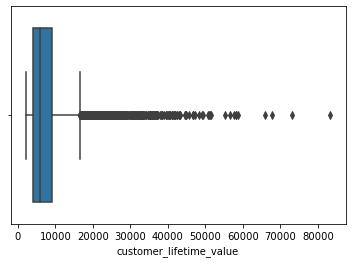

In [227]:
sns.boxplot(customers_df.customer_lifetime_value)

In [228]:
Q1 = customers_df.customer_lifetime_value.quantile(0.25)
Q3 = customers_df.customer_lifetime_value.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

In [229]:
filter = (customers_df["customer_lifetime_value"] >= Q1 - 1.5 * IQR) & (customers_df["customer_lifetime_value"] <= Q3 + 1.5 *IQR)
customers_df=customers_df.loc[filter] 

<AxesSubplot:>

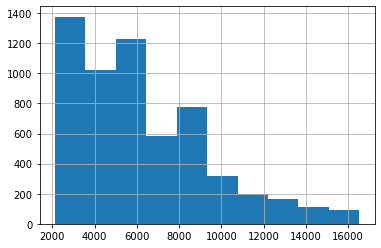

In [238]:
customers_df.customer_lifetime_value.hist()

<b> Monthly Premium Auto

<AxesSubplot:xlabel='monthly_premium_auto'>

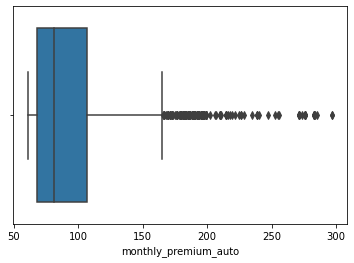

In [233]:
sns.boxplot(customers_df.monthly_premium_auto)

In [234]:
Q1 = customers_df.monthly_premium_auto.quantile(0.25)
Q3 = customers_df.monthly_premium_auto.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

In [235]:
IQR

39.0

In [236]:
filter = (customers_df["monthly_premium_auto"] >= Q1 - 1.5 * IQR) & (customers_df["monthly_premium_auto"] <= Q3 + 1.5 *IQR)
customers_df=customers_df.loc[filter]

In [237]:
customers_df

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize
6,California,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,8.0,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize
7,California,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize
8,California,5990.0,Yes,Premium,Employed,M,66839,Suburban,Single,154,33.0,24,0.0,1,Personal Auto,Personal,Offer2,Branch,739.0,Sports Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,Washington,4548.0,No,Premium,Employed,M,33531,Suburban,Married,116,11.0,15,0.0,1,Personal Auto,Personal,Offer4,Agent,802.0,Two-Door Car,Medsize
10902,California,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal,Offer2,Agent,655.0,Four-Door Car,Medsize
10903,Arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal,Offer2,Branch,355.0,Two-Door Car,Medsize
10906,Oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,7.0,68,0.0,3,Personal Auto,Personal,Offer2,Branch,273.0,Four-Door Car,Medsize


### Show a plot of the response rate by the sales channel.

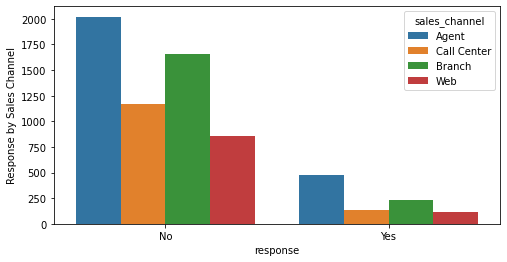

In [156]:
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales_channel', data=customers_df)
plt.ylabel('Response by Sales Channel')
plt.show()


### Show a plot of the response rate by the total claim amount.


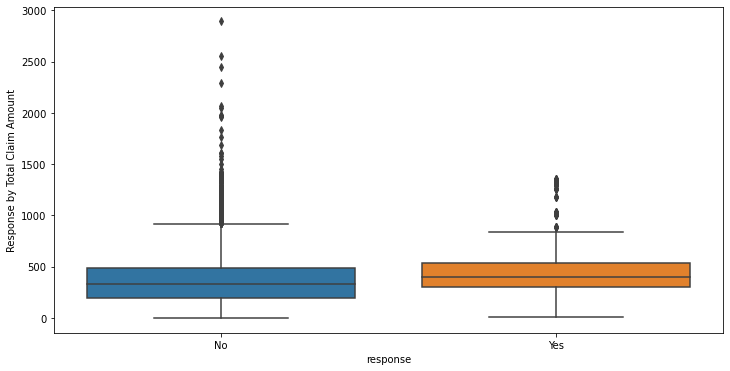

In [157]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=customers_df)
plt.ylabel('Response by Total Claim Amount')
plt.show()


### Show a plot of the response rate by income.


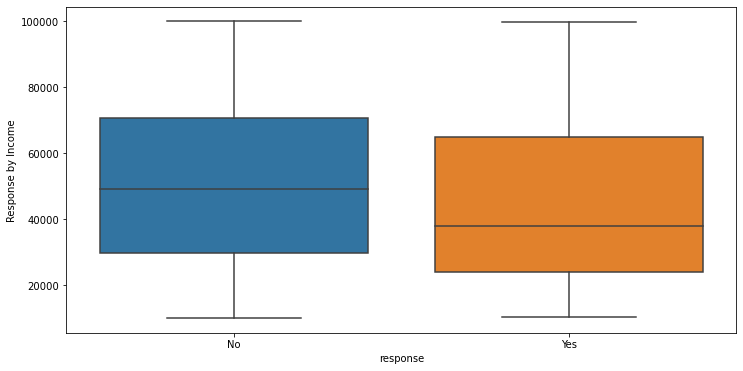

In [158]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=customers_df)
plt.ylabel('Response by Income')
plt.show()

# Data Transformation Lab

#### Check normality visually.

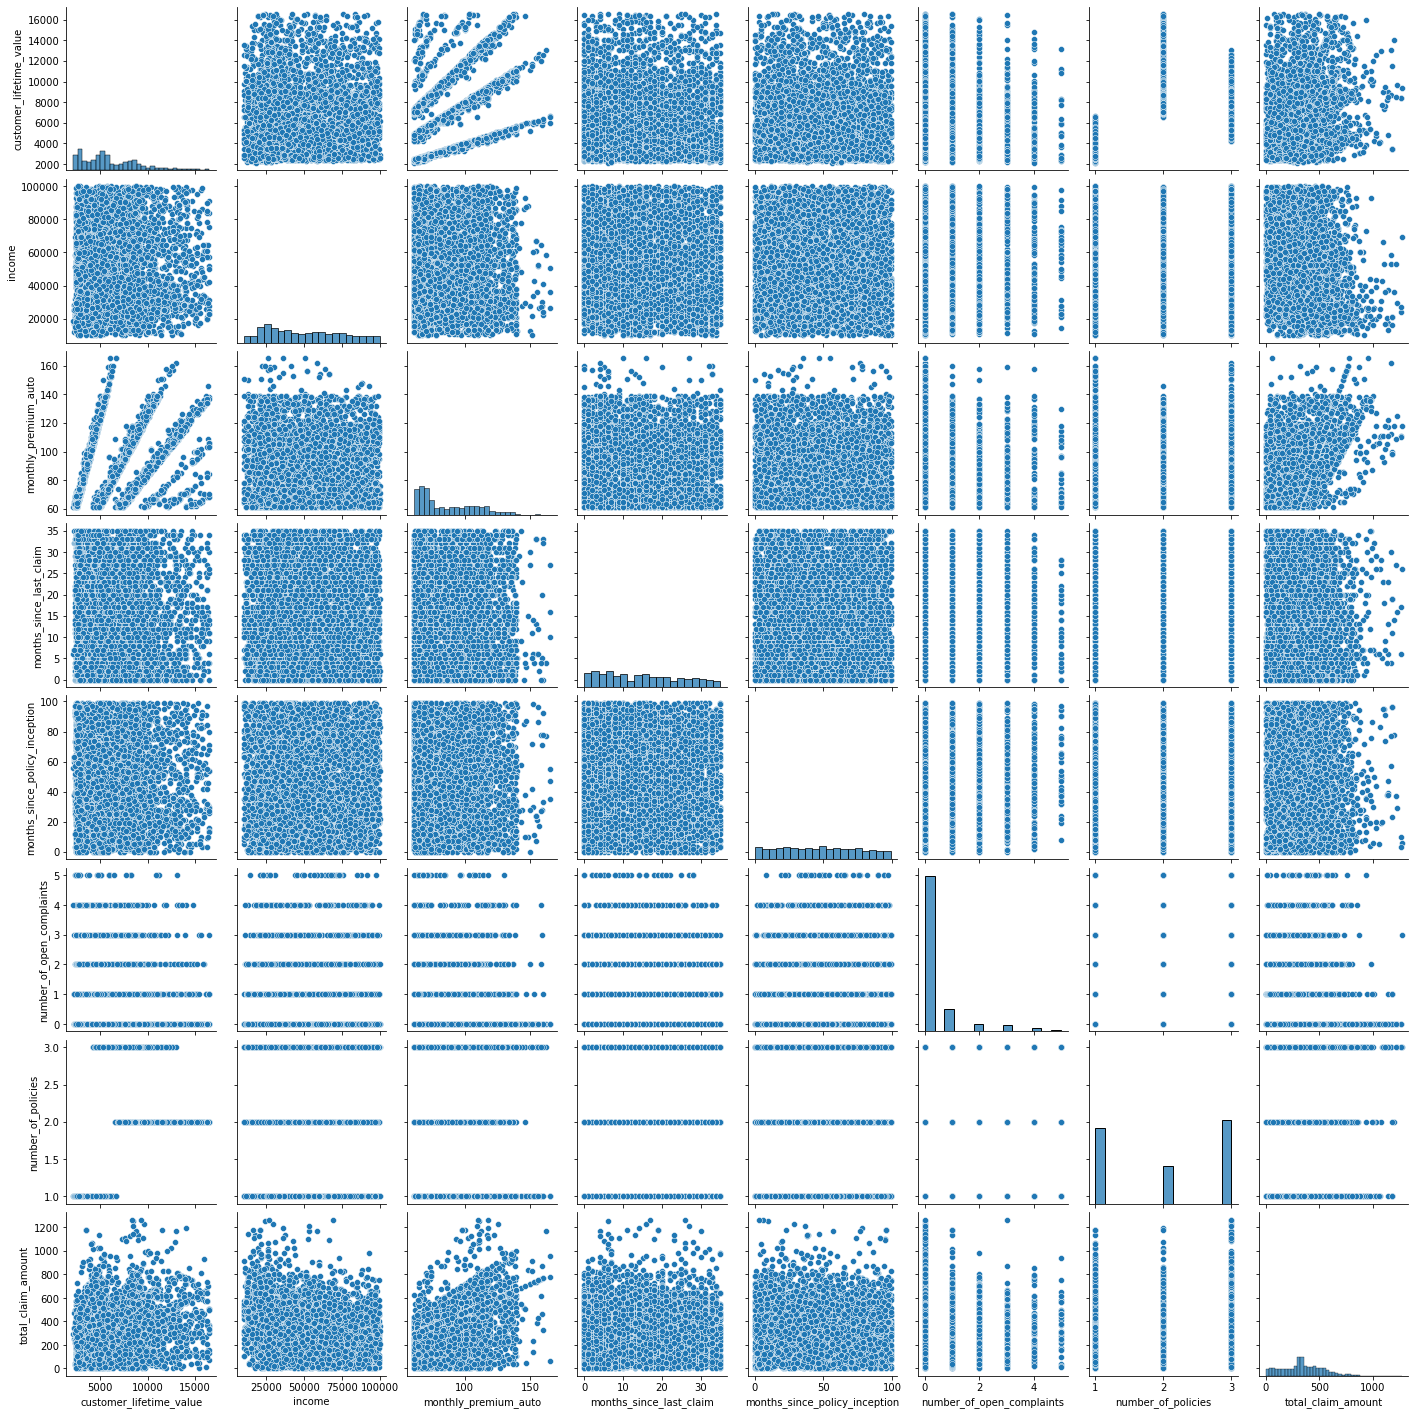

In [239]:
sns.pairplot(customers_df)
plt.show()

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

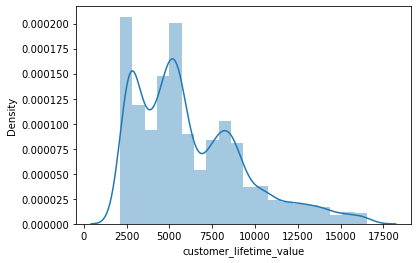

In [240]:
sns.distplot((customers_df['customer_lifetime_value']), bins=20)

In [241]:
customer_lifetime_value_transformed=boxcox(customers_df['customer_lifetime_value'],lmbda=-0.04)

<AxesSubplot:ylabel='Count'>

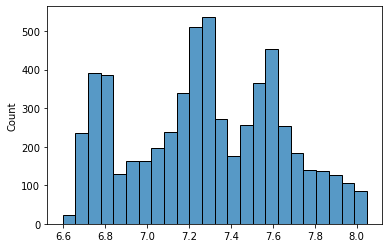

In [242]:
sns.histplot(customer_lifetime_value_transformed)

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

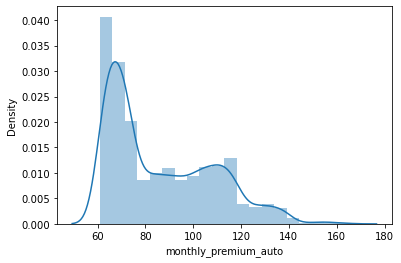

In [243]:
sns.distplot((customers_df['monthly_premium_auto']), bins=20)

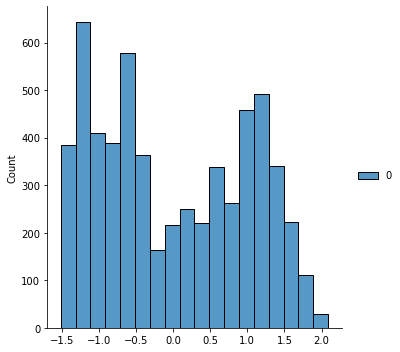

In [244]:
pt = PowerTransformer()
monthly_premium_auto_transformed=pt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly_premium_auto_transformed)

<AxesSubplot:ylabel='Count'>

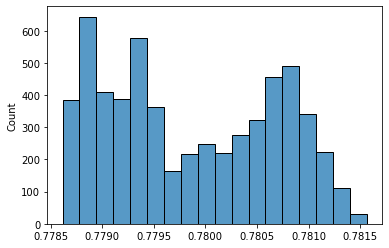

In [245]:
monthly_premium_auto_transformed,lam=boxcox(customers_df['monthly_premium_auto'])
sns.histplot(monthly_premium_auto_transformed)

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

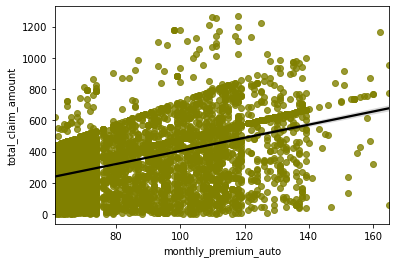

In [247]:
sns.regplot(x='monthly_premium_auto',y='total_claim_amount', data=customers_df, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

#### Checking Multicorrelinilaty

In [251]:
numericals_features=customers_df._get_numeric_data()
correlations = numericals_features.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.017464,0.426411,-0.009641,-0.011456,-0.017140,0.456072,0.192039
income,0.017464,1.000000,-0.006184,-0.034767,0.018437,0.011751,0.013597,-0.249410
monthly_premium_auto,0.426411,-0.006184,1.000000,-0.009703,0.000122,-0.005526,-0.026151,0.466769
months_since_last_claim,-0.009641,-0.034767,-0.009703,1.000000,-0.046060,0.010144,0.011353,-0.019150
months_since_policy_inception,-0.011456,0.018437,0.000122,-0.046060,1.000000,0.007468,-0.004346,-0.022386
number_of_open_complaints,-0.017140,0.011751,-0.005526,0.010144,0.007468,1.000000,0.011119,-0.008988
number_of_policies,0.456072,0.013597,-0.026151,0.011353,-0.004346,0.011119,1.000000,-0.027020
total_claim_amount,0.192039,-0.249410,0.466769,-0.019150,-0.022386,-0.008988,-0.027020,1.000000


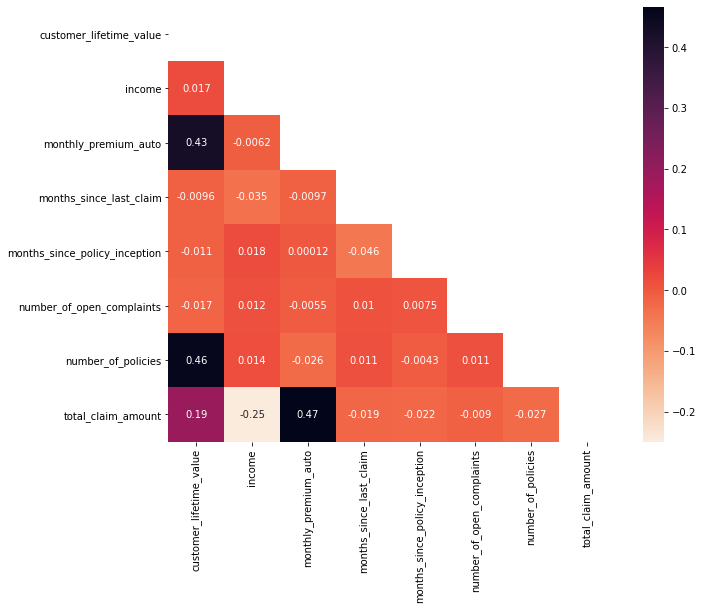

In [252]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

X-Y split  
splitting the target variable from the dependent variables

In [253]:
X=customers_df.drop('total_claim_amount', axis=1)
y=customers_df.total_claim_amount

In [254]:
X

,state,customer_lifetime_value,response,coverage,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,4809.0,No,Basic,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,Washington,14948.0,No,Basic,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
6,California,5035.0,No,Basic,Employed,F,37405,Urban,Married,63,8.0,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
7,California,4956.0,No,Basic,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
8,California,5990.0,Yes,Premium,Employed,M,66839,Suburban,Single,154,33.0,24,0.0,1,Personal Auto,Personal,Offer2,Branch,Sports Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,Washington,4548.0,No,Premium,Employed,M,33531,Suburban,Married,116,11.0,15,0.0,1,Personal Auto,Personal,Offer4,Agent,Two-Door Car,Medsize
10902,California,3579.0,No,Extended,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal,Offer2,Agent,Four-Door Car,Medsize
10903,Arizona,2772.0,No,Basic,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
10906,Oregon,5259.0,No,Basic,Employed,F,61146,Urban,Married,65,7.0,68,0.0,3,Personal Auto,Personal,Offer2,Branch,Four-Door Car,Medsize


Get the numeric data.

In [255]:
numericals_features =X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029,61,7.0,52,0.0,3
2,14948.0,22139,100,34.0,31,0.0,2
6,5035.0,37405,63,8.0,99,3.0,3
7,4956.0,87197,63,35.0,45,0.0,3
8,5990.0,66839,154,33.0,24,0.0,1


In [256]:
numericals_features.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000,5870.000000
mean,6243.174446,50637.092845,86.365588,14.972402,47.726746,0.390119,2.040204
std,3172.058923,24388.055540,21.965941,10.029939,27.900584,0.919732,0.898543
min,2120.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,3746.250000,28520.000000,68.000000,6.000000,24.000000,0.000000,1.000000
50%,5452.000000,48029.000000,79.000000,14.000000,47.000000,0.000000,2.000000
75%,8208.000000,70411.500000,104.000000,23.000000,71.000000,0.000000,3.000000
max,16532.000000,99981.000000,165.000000,35.000000,99.000000,5.000000,3.000000


Get Categorical data

In [258]:
categoricals_features = X.select_dtypes(object)
categoricals_features.head()

,state,response,coverage,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,Employed,M,Suburban,Married,Corporate Auto,Corporate,Offer3,Agent,Four-Door Car,Medsize
2,Washington,No,Basic,Employed,M,Suburban,Single,Personal Auto,Personal,Offer3,Call Center,Four-Door Car,Medsize
6,California,No,Basic,Employed,F,Urban,Married,Corporate Auto,Corporate,Offer2,Branch,Four-Door Car,Medsize
7,California,No,Basic,Employed,M,Urban,Single,Personal Auto,Personal,Offer2,Branch,Two-Door Car,Medsize
8,California,Yes,Premium,Employed,M,Suburban,Single,Personal Auto,Personal,Offer2,Branch,Sports Car,Medsize


### Categorical Variables Transformation

One Hot Encoding

In [259]:
# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [260]:
categoricals_features

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
6,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
7,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,1,0
8,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0
10902,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
10903,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0
10906,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0


In [355]:
all_features=pd.concat([numericals_features, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Personal,policy_Special,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,4809.0,48029,61,7.0,52,0.0,3,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,14948.0,22139,100,34.0,31,0.0,2,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
6,5035.0,37405,63,8.0,99,3.0,3,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
7,4956.0,87197,63,35.0,45,0.0,3,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,1,0
8,5990.0,66839,154,33.0,24,0.0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0


### Train Test Split

In [361]:
all_features=significant_features

In [362]:
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [363]:
X_train

,income,monthly_premium_auto,employmentstatus_Medical Leave,gender_M,location_code_Suburban,location_code_Urban,renew_offer_type_Offer2,renew_offer_type_Offer4,vehicle_class_Sports Car,vehicle_size_Small
5040,86721,110,0,0,0,1,0,0,0,0
1849,31485,118,0,1,0,0,1,0,0,0
5615,50461,131,0,0,1,0,0,0,1,0
4293,79189,95,0,0,0,0,1,0,0,1
5773,38725,64,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6634,79292,67,0,1,0,0,1,0,0,0
269,25915,64,0,0,1,0,0,0,0,0
2017,85956,145,0,1,0,1,0,0,0,1
7291,25918,104,1,1,1,0,0,0,0,0


#### Standardize

In [307]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [308]:
X_test_scaled=std_scaler.transform(X_test)

In [309]:
X_train_scaled[0]

array([-0.91479341, -0.46971979,  0.93763088, -0.53697318,  1.37277853,
       -0.37759645, -0.22222843,  2.03555472])

### Modeling using Statsmodels

<b>without scaling

In [364]:
X_train_const= sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1673.
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:18:49   Log-Likelihood:                -27960.
No. Observations:                4696   AIC:                         5.594e+04
Df Residuals:                    4685   BIC:                         5.601e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### checking the significant variables

In [359]:
model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[1:].index.tolist()

['income',
 'monthly_premium_auto',
 'employmentstatus_Medical Leave',
 'gender_M',
 'location_code_Suburban',
 'location_code_Urban',
 'renew_offer_type_Offer2',
 'renew_offer_type_Offer4',
 'vehicle_class_Sports Car',
 'vehicle_size_Small']

In [360]:
significant_features=all_features[model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[1:].index.tolist()]

<b> with scaling

In [310]:
X_train.columns

Index(['income', 'monthly_premium_auto', 'location_code_Suburban',
       'location_code_Urban', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer4', 'vehicle_class_Sports Car',
       'vehicle_size_Small'],
      dtype='object')

In [311]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2122.
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:57:23   Log-Likelihood:                -27890.
No. Observations:                4696   AIC:                         5.580e+04
Df Residuals:                    4687   BIC:                         5.586e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        347.3296      1.342    258.864      0.0

### Apply Linear Regression

In [317]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

y
y_pred=model.predict(X_test_scaled)   # model prediction


y_pred_train=model.predict(X_train_scaled)

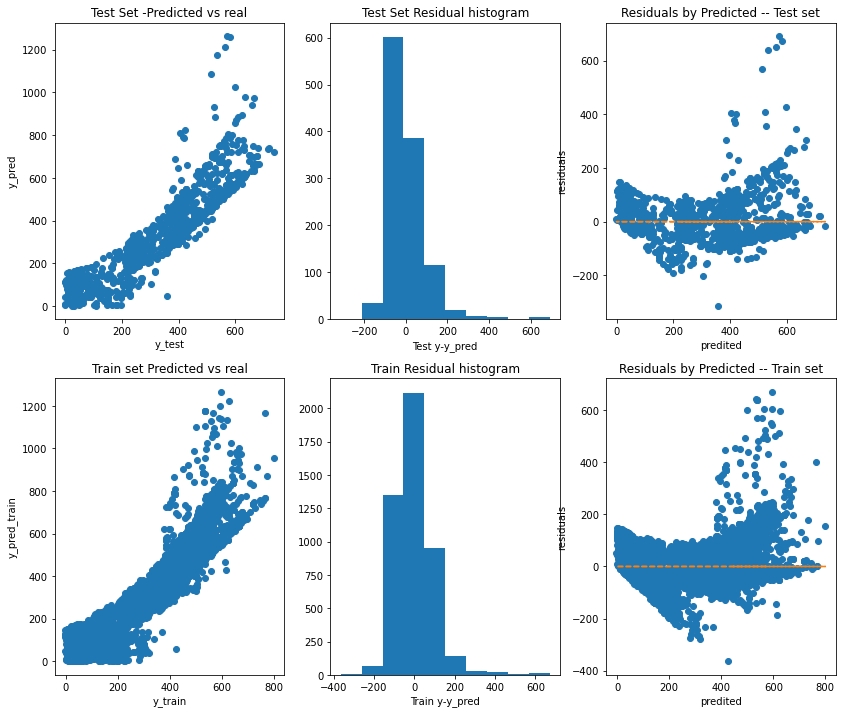

In [322]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,3,figsize=(14,12))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[0,2].plot(y_pred,y_test - y_pred,"o")
ax[0,2].set_xlabel("predited")
ax[0,2].set_ylabel("residuals")
ax[0,2].set_title("Residuals by Predicted -- Test set")
ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
ax[1,2].set_xlabel("predited")
ax[1,2].set_ylabel("residuals")
ax[1,2].set_title("Residuals by Predicted -- Train set")
ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')

#### Model Validation

MSE.

In [323]:
train_mse=mse(y_train,y_pred_train)
test_mse=mse(y_test,y_pred)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 8437.927128554613 -- test MSE: 8508.258702740974


RMSE.

In [324]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 91.85819031830864 -- test RMSE: 92.2402228029669


MAE.

In [325]:
train_mae=mae(y_train,y_pred_train)
test_mae=mae(y_test,y_pred)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 8437.927128554613 -- test MAE: 8508.258702740974


R2.

In [347]:
#R2= model.score(X_test_scaled, y_test)
R2_train=r2_score(y_train,y_pred_train)
R2_test=r2_score(y_test,y_pred)

print (R2_train)
print(R2_test)

0.7836365663075681
0.7893372111444481


In [335]:
print ('train R2: {} -- test R2: {}'.format(model.score(X_train_scaled, y_train),
                                            model.score(X_test_scaled, y_test)))

train R2: 0.7836365663075681 -- test R2: 0.7893372111444481


adjusted rsquare

In [349]:
Adj_R2_train= 1 - (1-R2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2_train

0.7832672666554368

In [348]:
Adj_R2_test= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2_test

0.7878905997188306

#### Feature Importance

In [350]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [351]:
## decide on each variable importance on your model using adjusted R_squared 

In [352]:
features_importances

,Attribute,Importance
2,location_code_Suburban,176.801056
1,monthly_premium_auto,88.646148
3,location_code_Urban,87.576814
0,income,7.201839
7,vehicle_size_Small,4.380912
6,vehicle_class_Sports Car,3.860402
4,renew_offer_type_Offer2,3.178827
5,renew_offer_type_Offer4,0.811840


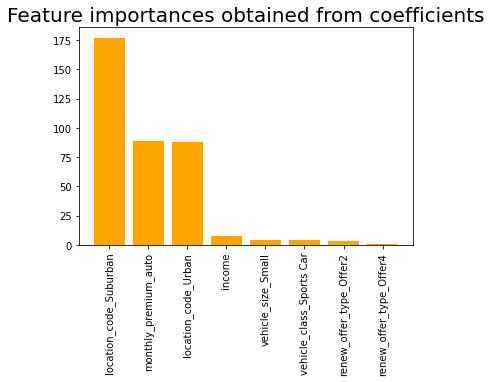

In [354]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='Orange')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()